In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "/content/nomis_2026_01_21_122505.xlsx"

raw = pd.read_excel(file_path, header=None)
display(raw.head(10))

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,annual population survey - regional - occupati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ONS Crown Copyright Reserved [from Nomis on 21...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,date,Oct 2024-Sep 2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,permanent/non-permanent,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,full/part-time,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,employee/self-employed,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,sex,All persons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,measure,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,confidence,95% confidence interval (+/-),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
HEADER_ROW = 7
df = pd.read_excel(file_path, header=HEADER_ROW)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w_]", "", regex=True)
)

In [8]:
df = df.dropna(how="all")

In [9]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [10]:
print("Shape:", df.shape)
df.info()

display(df.describe())

Shape: (559, 39)
<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 560
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          558 non-null    object 
 1   all_persons  552 non-null    float64
 2   unnamed_2    549 non-null    float64
 3   unnamed_3    552 non-null    float64
 4   unnamed_4    548 non-null    float64
 5   unnamed_5    552 non-null    float64
 6   unnamed_6    544 non-null    float64
 7   unnamed_7    494 non-null    float64
 8   unnamed_8    327 non-null    float64
 9   unnamed_9    520 non-null    float64
 10  unnamed_10   379 non-null    float64
 11  unnamed_11   441 non-null    float64
 12  unnamed_12   222 non-null    float64
 13  unnamed_13   552 non-null    float64
 14  unnamed_14   546 non-null    float64
 15  unnamed_15   474 non-null    float64
 16  unnamed_16   252 non-null    float64
 17  unnamed_17   526 non-null    float64
 18  unnamed_18   366 non-null    float64
 

,all_persons,unnamed_2,unnamed_3,unnamed_4,unnamed_5,unnamed_6,unnamed_7,unnamed_8,unnamed_9,unnamed_10,...,unnamed_29,unnamed_30,unnamed_31,unnamed_32,unnamed_33,unnamed_34,unnamed_35,unnamed_36,unnamed_37,unnamed_38
count,5.520000e+02,549.000000,5.520000e+02,548.000000,5.520000e+02,544.000000,4.940000e+02,327.000000,5.200000e+02,379.000000,...,5.330000e+02,407.000000,5.220000e+02,351.000000,4.940000e+02,327.000000,5.200000e+02,379.000000,441.000000,222.000000
mean,3.002402e+05,14965.209472,2.919793e+05,14913.868613,2.544268e+05,14572.242647,1.475547e+04,3288.379205,2.580596e+04,4699.736148,...,4.427373e+04,7108.108108,2.723506e+04,5590.313390,1.475547e+04,3288.379205,2.580596e+04,4699.736148,10286.848073,3381.081081
std,1.537337e+06,16270.219622,1.495457e+06,16203.759387,1.304073e+06,15809.154798,7.101575e+04,2950.000437,1.280530e+05,4405.428942,...,2.233910e+05,6832.615790,1.353446e+05,5110.467428,7.101575e+04,2950.000437,1.280530e+05,4405.428942,46951.661402,2733.056020
min,1.800000e+03,2300.000000,1.500000e+03,2500.000000,1.200000e+03,2500.000000,5.000000e+02,1200.000000,5.000000e+02,1500.000000,...,5.000000e+02,2200.000000,6.000000e+02,2000.000000,5.000000e+02,1200.000000,5.000000e+02,1500.000000,500.000000,1400.000000
25%,2.972500e+04,7100.000000,2.867500e+04,7000.000000,2.522500e+04,6875.000000,1.625000e+03,1800.000000,2.675000e+03,2500.000000,...,4.400000e+03,3700.000000,3.000000e+03,3000.000000,1.625000e+03,1800.000000,2.675000e+03,2500.000000,1100.000000,1900.000000
50%,6.315000e+04,10100.000000,6.150000e+04,10150.000000,5.350000e+04,9800.000000,3.400000e+03,2300.000000,5.900000e+03,3300.000000,...,1.010000e+04,5200.000000,6.250000e+03,4000.000000,3.400000e+03,2300.000000,5.900000e+03,3300.000000,2500.000000,2450.000000
75%,1.823000e+05,17200.000000,1.780250e+05,17200.000000,1.569750e+05,16925.000000,9.100000e+03,3600.000000,1.580000e+04,5250.000000,...,2.730000e+04,7950.000000,1.637500e+04,6150.000000,9.100000e+03,3600.000000,1.580000e+04,5250.000000,6100.000000,3800.000000
max,3.318480e+07,231700.000000,3.227200e+07,230600.000000,2.812290e+07,224300.000000,1.462000e+06,36300.000000,2.687000e+06,56600.000000,...,4.724400e+06,89500.000000,2.846200e+06,64300.000000,1.462000e+06,36300.000000,2.687000e+06,56600.000000,912800.000000,29900.000000


In [11]:
new_names = {
    col: f"value_{i}"
    for i, col in enumerate(df.columns)
    if col.startswith("unnamed")
}

df = df.rename(columns=new_names)

In [12]:
id_col = df.columns[0]

long_df = df.melt(
    id_vars=id_col,
    var_name="metric",
    value_name="value"
)

long_df = long_df.dropna(subset=["value"])

display(long_df.head())

,sex,metric,value
4,Total,all_persons,33184800.0
5,"1 : Managers, Directors And Senior Official",all_persons,3745000.0
6,11 : Corporate Managers And Directors,all_persons,2583800.0
7,111 : Chief Executives and Senior Officials,all_persons,196100.0
8,1111 : Chief executives and senior officials,all_persons,182900.0


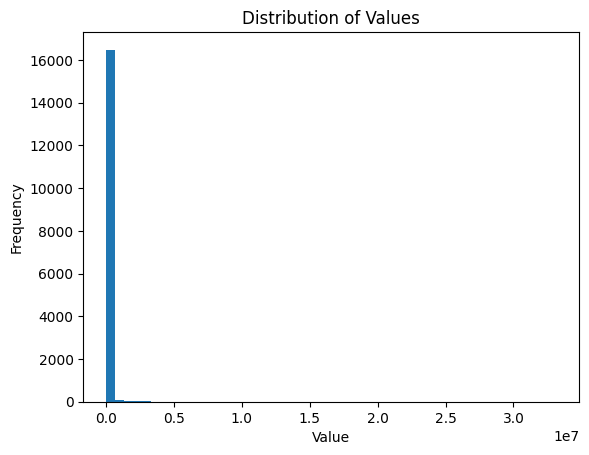

In [13]:
plt.figure()
plt.hist(long_df["value"], bins=50)
plt.title("Distribution of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

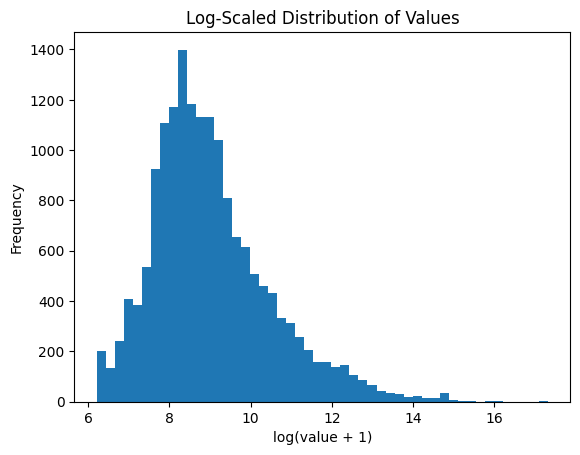

In [14]:
plt.figure()
plt.hist(np.log1p(long_df["value"]), bins=50)
plt.title("Log-Scaled Distribution of Values")
plt.xlabel("log(value + 1)")
plt.ylabel("Frequency")
plt.show()

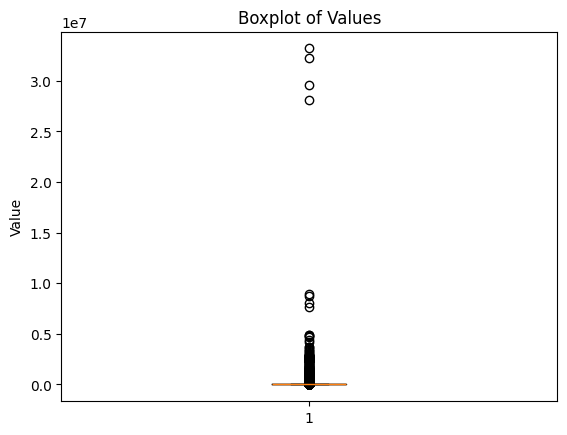

In [15]:
plt.figure()
plt.boxplot(long_df["value"])
plt.title("Boxplot of Values")
plt.ylabel("Value")
plt.show()

In [16]:
summary = (
    long_df
    .groupby("metric")["value"]
    .agg(["count", "mean", "median", "min", "max"])
    .sort_values("mean", ascending=False)
)

display(summary.head(10))

,count,mean,median,min,max
metric,,,,,
all_persons,552,300240.217391,63150.0,1800.0,33184800.0
value_3,552,291979.347826,61500.0,1500.0,32272000.0
value_13,552,267656.702899,56500.0,1200.0,29585000.0
value_5,552,254426.811594,53500.0,1200.0,28122900.0
value_27,497,48674.446680,9900.0,500.0,4848400.0
value_29,533,44273.733583,10100.0,500.0,4724400.0
value_17,526,33306.273764,7600.0,500.0,3512200.0
value_25,516,30698.643411,6750.0,500.0,3174300.0
value_23,514,27715.758755,6200.0,500.0,2853100.0


In [17]:
df.to_csv("/content/nomis_cleaned_wide.csv", index=False)
long_df.to_csv("/content/nomis_cleaned_long.csv", index=False)

print("Saved:")
print("- nomis_cleaned_wide.csv")
print("- nomis_cleaned_long.csv")

Saved:
- nomis_cleaned_wide.csv
- nomis_cleaned_long.csv


Plots & Graphs for Answer

In [18]:
df = pd.read_csv("/content/nomis_cleaned_wide.csv")

job_col = df.columns[0]
year_cols = df.columns[1:]

df[year_cols] = df[year_cols].apply(pd.to_numeric, errors="coerce")

In [19]:
df["growth_5yr"] = (
    (df[year_cols[-1]] - df[year_cols[-6]]) / df[year_cols[-6]]
) * 100

df["growth_10yr"] = (
    (df[year_cols[-1]] - df[year_cols[-11]]) / df[year_cols[-11]]
) * 100

,sex,growth_5yr
446,7129 : Sales related occupations n.e.c.,35.294118
208,3219 : Health associate professionals n.e.c.,20.000000
356,5313 : Bricklayers,12.500000
19,1135 : Charitable organisation managers and di...,7.142857
385,544 : Other Skilled Trades,5.263158
396,6114 : Childminders,0.000000
35,121 : Managers and Proprietors in Agriculture ...,0.000000
284,4113 : Officers of non-governmental organisations,-5.263158
420,6222 : Beauticians and related occupations,-9.523810
440,712 : Sales Related Occupations,-15.151515


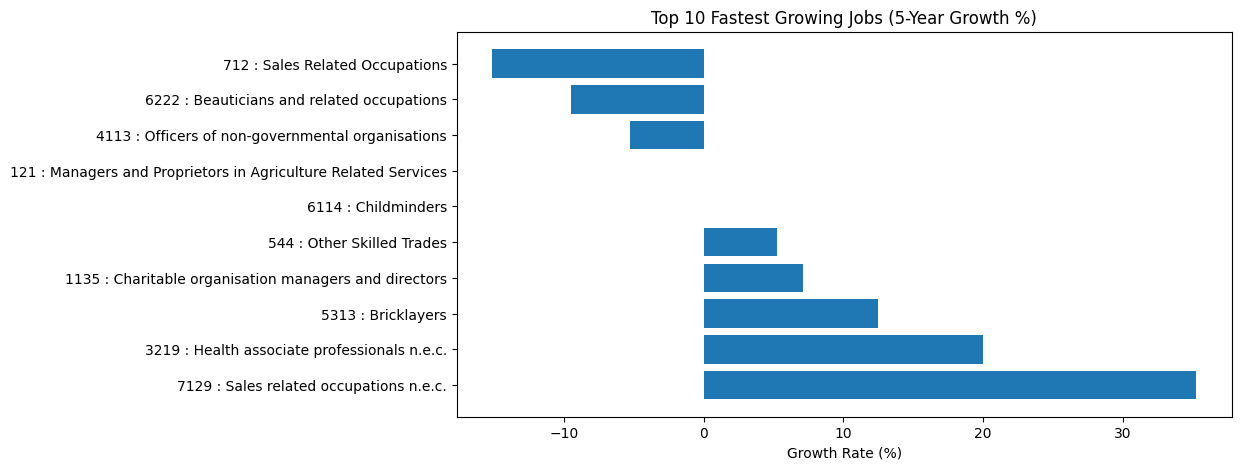

In [20]:
top_growth = (
    df[[job_col, "growth_5yr"]]
    .dropna()
    .sort_values("growth_5yr", ascending=False)
    .head(10)
)

display(top_growth)

plt.figure(figsize=(10,5))
plt.barh(top_growth[job_col], top_growth["growth_5yr"])
plt.title("Top 10 Fastest Growing Jobs (5-Year Growth %)")
plt.xlabel("Growth Rate (%)")
plt.show()

,sex,growth_5yr
4,Total,-97.954856
186,3 : Associate Professional Occupations,-95.683780
62,2 : Professional Occupations,-95.588235
5,"1 : Managers, Directors And Senior Official",-94.224312
510,9 : Elementary Occupations,-93.854749
523,92 : Elementary Administration And Service Occ...,-93.755004
390,"6 : Caring, Leisure And Other Service Occupations",-93.347639
244,35 : Business And Public Service Associate Pro...,-93.347193
315,5 : Skilled Trades Occupations,-93.233083
6,11 : Corporate Managers And Directors,-93.125000


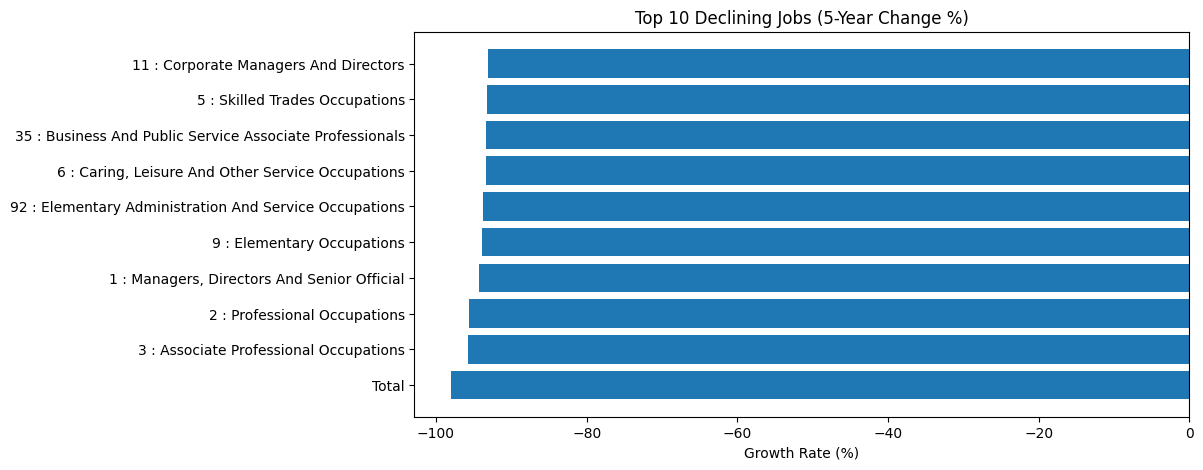

In [21]:
declining = (
    df[[job_col, "growth_5yr"]]
    .dropna()
    .sort_values("growth_5yr")
    .head(10)
)

display(declining)

plt.figure(figsize=(10,5))
plt.barh(declining[job_col], declining["growth_5yr"])
plt.title("Top 10 Declining Jobs (5-Year Change %)")
plt.xlabel("Growth Rate (%)")
plt.show()

In [22]:
df["current_size"] = df[year_cols[-1]]

shortage_roles = (
    df
    .query("growth_5yr > 20")
    .sort_values("current_size")
    [[job_col, "growth_5yr", "current_size"]]
    .head(10)
)

display(shortage_roles)

,sex,growth_5yr,current_size
446,7129 : Sales related occupations n.e.c.,35.294118,2300.0


In [25]:
# Calculate baseline size (5 years ago)
df["baseline_5yr"] = df[year_cols[-6]]

# Thresholds based on data distribution
growth_cutoff = df["growth_5yr"].quantile(0.90)
size_cutoff = df["baseline_5yr"].quantile(0.40)

emerging_roles = df[
    (df["growth_5yr"] >= growth_cutoff) &
    (df["baseline_5yr"] <= size_cutoff)
][[job_col, "baseline_5yr", year_cols[-1], "growth_5yr"]]

display(emerging_roles.head(10))

,sex,baseline_5yr,value_38,growth_5yr
19,1135 : Charitable organisation managers and di...,1400.0,1500.0,7.142857
35,121 : Managers and Proprietors in Agriculture ...,1800.0,1800.0,0.000000
78,2127 : Engineering project managers and projec...,2600.0,1600.0,-38.461538
113,2233 : Specialist nurses,2600.0,2000.0,-23.076923
208,3219 : Health associate professionals n.e.c.,1500.0,1800.0,20.000000
284,4113 : Officers of non-governmental organisations,1900.0,1800.0,-5.263158
356,5313 : Bricklayers,1600.0,1800.0,12.500000
385,544 : Other Skilled Trades,1900.0,2000.0,5.263158
396,6114 : Childminders,1900.0,1900.0,0.000000
420,6222 : Beauticians and related occupations,2100.0,1900.0,-9.523810


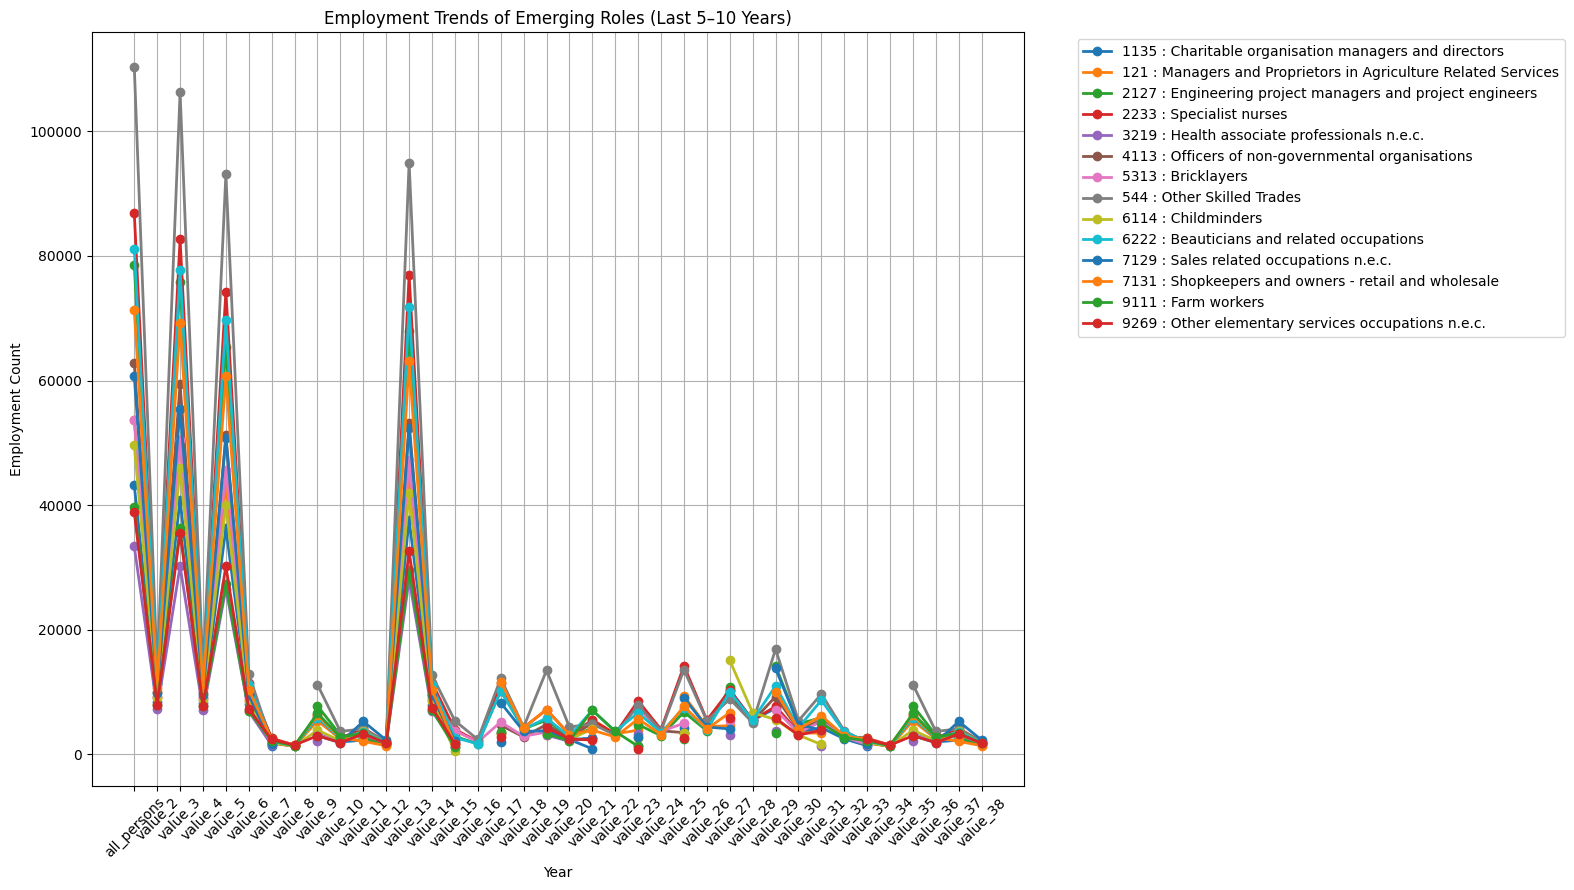

In [27]:
years = year_cols

plot_df = df.loc[emerging_roles.index, [job_col] + list(years)]

plt.figure(figsize=(16, 9))

for _, row in plot_df.iterrows():
    plt.plot(
        years,
        row[years],
        marker="o",
        linewidth=2,
        label=row[job_col]
    )

plt.title("Employment Trends of Emerging Roles (Last 5–10 Years)")
plt.xlabel("Year")
plt.ylabel("Employment Count")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df["volatility"] = df[year_cols].std(axis=1)

resilient_jobs = (
    df
    .sort_values("volatility")
    [[job_col, "volatility"]]
    .head(10)
)

display(resilient_jobs)

,sex,volatility
381,5433 : Fishmongers and poultry dressers,444.971909
158,2435 : Professional/Chartered company secretaries,792.464510
328,5214 : Pipe fitters,1112.269238
375,5421 : Pre-press technicians,1201.110597
481,"8144 : Weighers, graders and sorters",1286.468033
314,4217 : Typists and related keyboard occupations,1439.002180
371,5412 : Footwear and leather working trades,1470.683205
331,"5222 : Tool makers, tool fitters and markers-out",1508.039064
400,6121 : Pest control officers,1619.951365
47,1233 : Early education and childcare services ...,1658.163289


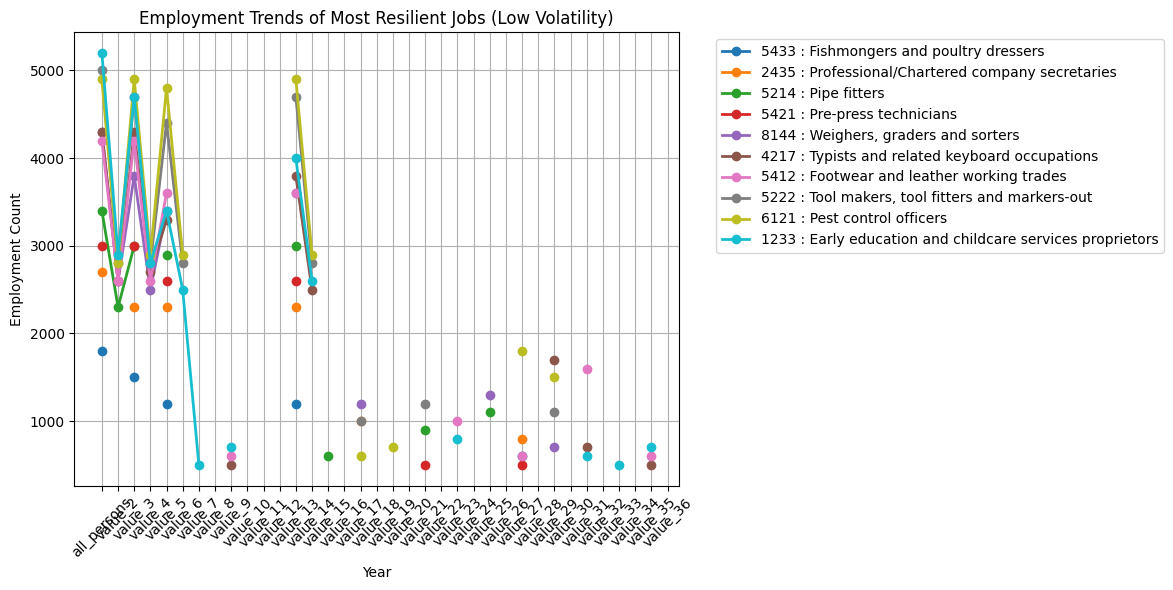

In [29]:
plot_df = df.loc[resilient_jobs.index, [job_col] + list(year_cols)]

plt.figure(figsize=(12, 6))

for _, row in plot_df.iterrows():
    plt.plot(
        year_cols,
        row[year_cols],
        marker="o",
        linewidth=2,
        label=row[job_col]
    )

plt.title("Employment Trends of Most Resilient Jobs (Low Volatility)")
plt.xlabel("Year")
plt.ylabel("Employment Count")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()